In [435]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [436]:
events = pd.read_csv('/content/Engagemnet metrics.csv')
orders = pd.read_csv('/content/orders_data.csv')
customers = pd.read_csv('/content/cx_data.csv')

In [437]:
events

,user_id,event_date,event_name
0,6276693655790,20250901,view_item
1,8447960482030,20250901,search
2,8675885908206,20250901,search
3,8748084199662,20250901,search
4,8540297920750,20250901,search
...,...,...,...
569391,7572733165806,20250914,session_start
569392,7558481772782,20250914,session_start
569393,8731272151278,20250914,view_item
569394,6781359325422,20250914,session_start


In [438]:
orders

,order_id,customer_id,order_date,order_status,net_sales,disc
0,6.698909e+12,5.975963e+12,01-09-2025 00:00,Valid,5762.37,0.225906
1,6.698908e+12,6.929656e+12,01-09-2025 00:00,Valid,724.50,0.216757
2,6.698906e+12,8.773464e+12,01-09-2025 00:00,Valid,3315.01,0.294380
3,6.698906e+12,6.000590e+12,01-09-2025 00:00,Valid,1609.30,0.115769
4,6.698905e+12,6.929656e+12,01-09-2025 00:00,Not Valid,0.00,NaN
...,...,...,...,...,...,...
88810,NaN,NaN,NaN,NaN,NaN,NaN
88811,NaN,NaN,NaN,NaN,NaN,NaN
88812,NaN,NaN,NaN,NaN,NaN,NaN
88813,NaN,NaN,NaN,NaN,NaN,NaN


In [439]:
customers

,customer_id,registered_date,city,acquistion_channel
0,5.289110e+12,12-05-2021 00:00,Bangalore,Channel 1
1,5.252448e+12,13-05-2021 00:00,Bangalore,Channel 1
2,5.275405e+12,21-05-2021 00:00,Chengalpattu,Channel 1
3,5.288597e+12,25-05-2021 00:00,Palamu,Channel 15
4,5.289059e+12,25-05-2021 00:00,Bangalore,Channel 1
...,...,...,...,...
106410,NaN,NaN,NaN,NaN
106411,NaN,NaN,NaN,NaN
106412,NaN,NaN,NaN,NaN
106413,NaN,NaN,NaN,NaN


**Question 1: Data Cleaning & Preparation**

event table cleaning

In [440]:
events.head()

,user_id,event_date,event_name
0,6276693655790,20250901,view_item
1,8447960482030,20250901,search
2,8675885908206,20250901,search
3,8748084199662,20250901,search
4,8540297920750,20250901,search


In [441]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569396 entries, 0 to 569395
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     569396 non-null  int64 
 1   event_date  569396 non-null  int64 
 2   event_name  569396 non-null  object
dtypes: int64(2), object(1)
memory usage: 13.0+ MB


In [442]:
events.isnull().sum()

,0
user_id,0
event_date,0
event_name,0


In [443]:
events.shape

(569396, 3)

In [444]:
events.duplicated().sum()

np.int64(0)

In [445]:
# Fix event_date Format
events['event_date'] = pd.to_datetime(events['event_date'], format='%Y%m%d', errors='coerce')

In [446]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569396 entries, 0 to 569395
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     569396 non-null  int64         
 1   event_date  569396 non-null  datetime64[ns]
 2   event_name  569396 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 13.0+ MB


In [447]:
events = events.dropna(subset=['event_date'])

Order table cleaning

In [448]:
orders.head()

,order_id,customer_id,order_date,order_status,net_sales,disc
0,6.698909e+12,5.975963e+12,01-09-2025 00:00,Valid,5762.37,0.225906
1,6.698908e+12,6.929656e+12,01-09-2025 00:00,Valid,724.50,0.216757
2,6.698906e+12,8.773464e+12,01-09-2025 00:00,Valid,3315.01,0.294380
3,6.698906e+12,6.000590e+12,01-09-2025 00:00,Valid,1609.30,0.115769
4,6.698905e+12,6.929656e+12,01-09-2025 00:00,Not Valid,0.00,NaN


In [449]:
orders.shape

(88815, 6)

In [450]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88815 entries, 0 to 88814
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      43916 non-null  float64
 1   customer_id   43903 non-null  float64
 2   order_date    43916 non-null  object 
 3   order_status  43916 non-null  object 
 4   net_sales     43916 non-null  float64
 5   disc          41303 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [451]:
orders.isnull().sum()

,0
order_id,44899
customer_id,44912
order_date,44899
order_status,44899
net_sales,44899
disc,47512


In [452]:
# Remove Fully Empty Rows
orders = orders.dropna(how='all')

In [453]:
orders.shape

(43916, 6)

In [454]:
# Remove Rows with Missing order_id
orders = orders.dropna(subset=['order_id'])

In [455]:
# Remove Missing customer_id
orders = orders.dropna(subset=['customer_id'])

In [456]:
# Convert order_date
orders['order_date'] = pd.to_datetime(orders['order_date'],dayfirst=True,errors='coerce')
orders['order_date']

,order_date
0,2025-09-01
1,2025-09-01
2,2025-09-01
3,2025-09-01
4,2025-09-01
...,...
43911,2025-09-14
43912,2025-09-14
43913,2025-09-14
43914,2025-09-14


In [457]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43903 entries, 0 to 43915
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      43903 non-null  float64       
 1   customer_id   43903 non-null  float64       
 2   order_date    43903 non-null  datetime64[ns]
 3   order_status  43903 non-null  object        
 4   net_sales     43903 non-null  float64       
 5   disc          41291 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 2.3+ MB


In [458]:
# Remove invalid dates
orders = orders.dropna(subset=['order_date'])

Clean order_status

In [459]:
# Convert to lowercase
orders['order_status'] = orders['order_status'].str.lower().str.strip()

In [460]:
# Filter only valid
orders.head()

,order_id,customer_id,order_date,order_status,net_sales,disc
0,6.698909e+12,5.975963e+12,2025-09-01,valid,5762.37,0.225906
1,6.698908e+12,6.929656e+12,2025-09-01,valid,724.50,0.216757
2,6.698906e+12,8.773464e+12,2025-09-01,valid,3315.01,0.294380
3,6.698906e+12,6.000590e+12,2025-09-01,valid,1609.30,0.115769
4,6.698905e+12,6.929656e+12,2025-09-01,not valid,0.00,NaN


In [461]:
orders = orders[orders['order_status'] == 'valid']

Handle net_sales

In [462]:
# If net_sales is null or negative
orders = orders.dropna(subset=['net_sales'])

In [463]:
orders = orders[orders['net_sales'] > 0]

Handle disc%

In [464]:
orders['disc'] = orders['disc'].fillna(0)

In [465]:
# Remove Duplicate order_id
orders = orders.drop_duplicates(subset=['order_id'])

CUSTOMERS DATA CLEANING

In [466]:
customers.shape

(106415, 4)

In [467]:
customers.head()

,customer_id,registered_date,city,acquistion_channel
0,5.289110e+12,12-05-2021 00:00,Bangalore,Channel 1
1,5.252448e+12,13-05-2021 00:00,Bangalore,Channel 1
2,5.275405e+12,21-05-2021 00:00,Chengalpattu,Channel 1
3,5.288597e+12,25-05-2021 00:00,Palamu,Channel 15
4,5.289059e+12,25-05-2021 00:00,Bangalore,Channel 1


In [468]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106415 entries, 0 to 106414
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         82998 non-null  float64
 1   registered_date     82998 non-null  object 
 2   city                82833 non-null  object 
 3   acquistion_channel  82998 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.2+ MB


In [469]:
customers.isnull().sum()

,0
customer_id,23417
registered_date,23417
city,23582
acquistion_channel,23417


In [470]:
# Remove Fully Empty Rows
customers = customers.dropna(how='all')

In [471]:
customers.shape

(82998, 4)

In [472]:
# Remove Missing customer_id
customers = customers.dropna(subset=['customer_id'])

In [473]:
# Convert registered_date
customers['registered_date'] = pd.to_datetime(customers['registered_date'],errors='coerce')
customers['registered_date']

,registered_date
0,2021-12-05
1,NaT
2,NaT
3,NaT
4,NaT
...,...
82993,NaT
82994,NaT
82995,NaT
82996,NaT


In [474]:
# Remove invalid
customers = customers.dropna(subset=['registered_date'])

In [475]:
# Handle Missing city
customers['city'] = customers['city'].fillna("unknown")

In [476]:
# Handle Missing acq_channel
customers['acquistion_channel'] = customers['acquistion_channel'].fillna("organic")

In [477]:
# Remove Duplicate customer_id
customers = customers.drop_duplicates(subset=['customer_id'])

In [478]:
# ID Type Consistency
events['user_id'] = events['user_id'].astype(str)
orders['customer_id'] = orders['customer_id'].astype(str)
customers['customer_id'] = customers['customer_id'].astype(str)

**Question 2: User Engagement → Purchase Funnel**

In [479]:
# Users who triggered any event
users_with_events = events['user_id'].nunique()
users_with_events

147336

In [480]:
# Users who placed at least one valid order
users_with_orders = orders['customer_id'].nunique()
users_with_orders

32964

In [481]:
# Conversion Rate
conversion_rate = users_with_orders / users_with_events

In [482]:
print("Users with Events:", users_with_events)
print("Users with Valid Orders:", users_with_orders)
print("Conversion Rate:", round(conversion_rate * 100, 2), "%")

Users with Events: 147336
Users with Valid Orders: 32964
Conversion Rate: 22.37 %


DAILY TREND ANALYSIS

In [483]:
# Daily Active Users
daily_active = (events.groupby('event_date')['user_id'].nunique().reset_index())
daily_active

,event_date,user_id
0,2025-09-01,31205
1,2025-09-02,30223
2,2025-09-03,28182
3,2025-09-04,52
4,2025-09-05,377
5,2025-09-06,30123
6,2025-09-07,28984
7,2025-09-08,28181
8,2025-09-09,27486
9,2025-09-10,27409


In [484]:
daily_active.columns = ['date', 'active_users']
daily_active

,date,active_users
0,2025-09-01,31205
1,2025-09-02,30223
2,2025-09-03,28182
3,2025-09-04,52
4,2025-09-05,377
5,2025-09-06,30123
6,2025-09-07,28984
7,2025-09-08,28181
8,2025-09-09,27486
9,2025-09-10,27409


In [485]:
# Daily Ordering Customers
daily_orders = (orders.groupby('order_date')['customer_id'].nunique().reset_index())
daily_orders

,order_date,customer_id
0,2025-09-01,3237
1,2025-09-02,3054
2,2025-09-03,2789
3,2025-09-04,2602
4,2025-09-05,2180
5,2025-09-06,2468
6,2025-09-07,2476
7,2025-09-08,2364
8,2025-09-09,2408
9,2025-09-10,2422


In [486]:
daily_orders.columns = ['date', 'ordering_customers']

In [487]:
# Merge both
daily_trend = pd.merge(daily_active,daily_orders,on='date',how='left')
daily_trend

,date,active_users,ordering_customers
0,2025-09-01,31205,3237
1,2025-09-02,30223,3054
2,2025-09-03,28182,2789
3,2025-09-04,52,2602
4,2025-09-05,377,2180
5,2025-09-06,30123,2468
6,2025-09-07,28984,2476
7,2025-09-08,28181,2364
8,2025-09-09,27486,2408
9,2025-09-10,27409,2422


In [488]:
daily_trend['ordering_customers'] = daily_trend['ordering_customers'].fillna(0)

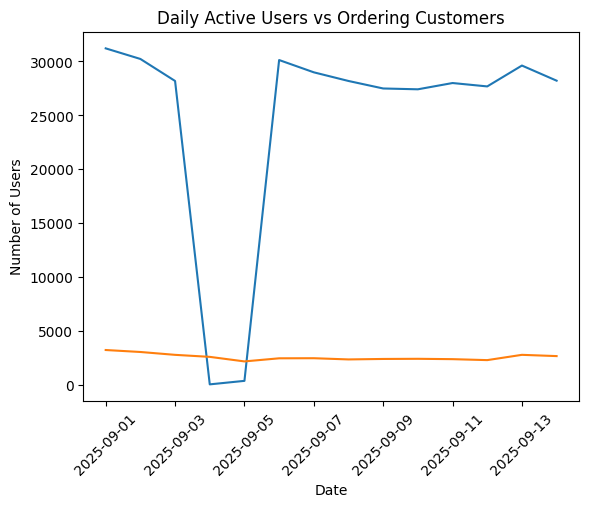

In [489]:
# TIME SERIES VISUALIZATION

plt.figure()

plt.plot(daily_trend['date'], daily_trend['active_users'])
plt.plot(daily_trend['date'], daily_trend['ordering_customers'])

plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of Users")
plt.title("Daily Active Users vs Ordering Customers")

plt.show()

The chart shows a significant gap between daily active users and ordering customers, indicating that only a portion of engaged users convert into buyers.
While user engagement remains consistently high, purchasing activity fluctuates across days.
This suggests potential opportunities to improve conversion through targeted promotions or optimized user journeys.

**Question 3: Customer Behavior Insight**

In [490]:
# Join Customers & Orders
customer_orders = pd.merge(orders,customers,on='customer_id',how='left')
customer_orders

,order_id,customer_id,order_date,order_status,net_sales,disc,registered_date,city,acquistion_channel
0,6.698909e+12,5975963173102.0,2025-09-01,valid,5762.37,0.225906,2021-02-12,Thane,Channel 1
1,6.698908e+12,6929655791854.0,2025-09-01,valid,724.50,0.216757,NaT,NaN,NaN
2,6.698906e+12,8773464359150.0,2025-09-01,valid,3315.01,0.294380,2025-01-09,Chengalpattu,Channel 4
3,6.698906e+12,6000590192878.0,2025-09-01,valid,1609.30,0.115769,NaT,NaN,NaN
4,6.698905e+12,8309890515182.0,2025-09-01,valid,1846.01,0.313498,2025-02-04,Gautam buddha nagar,Channel 3
...,...,...,...,...,...,...,...,...,...
37048,6.741722e+12,7477451948270.0,2025-09-14,valid,144.00,0.040000,2024-09-04,Valsad,Channel 1
37049,6.741721e+12,8329640870126.0,2025-09-14,valid,2870.00,0.201891,NaT,NaN,NaN
37050,6.741721e+12,6139621114094.0,2025-09-14,valid,1434.50,0.202169,NaT,NaN,NaN
37051,6.741718e+12,8378402898158.0,2025-09-14,valid,136.00,0.028571,NaT,NaN,NaN


In [492]:
# Revenue by Acquisition Channel
revenue_by_channel = (customer_orders.groupby('acquistion_channel')['net_sales'].sum().reset_index())
revenue_by_channel

,acquistion_channel,net_sales
0,Channel 1,5943469.20
1,Channel 10,1603272.78
2,Channel 11,1018865.19
3,Channel 12,381511.77
4,Channel 13,197638.27
5,Channel 14,438798.96
6,Channel 15,2924774.51
7,Channel 16,86421.67
8,Channel 17,364522.55
9,Channel 18,512189.87


In [493]:
# Sort descending
revenue_by_channel = revenue_by_channel.sort_values(by='net_sales',ascending=False)
revenue_by_channel

,acquistion_channel,net_sales
15,Channel 7,6122017.99
12,Channel 4,6051571.28
0,Channel 1,5943469.20
10,Channel 2,4929289.92
6,Channel 15,2924774.51
16,Channel 8,2210777.81
1,Channel 10,1603272.78
11,Channel 3,1173251.43
2,Channel 11,1018865.19
13,Channel 5,816054.23


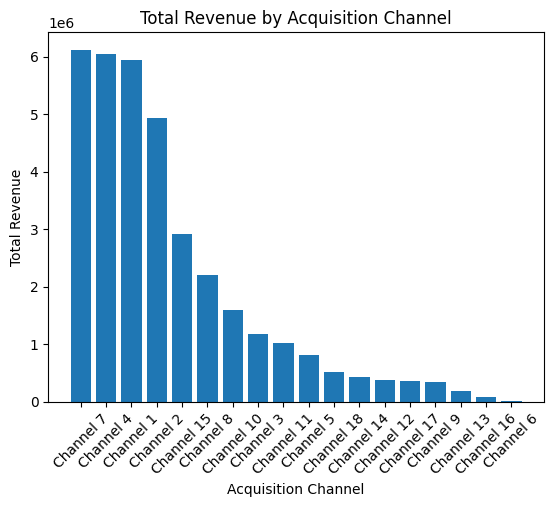

In [494]:
# Bar Chart
plt.figure()

plt.bar(
    revenue_by_channel['acquistion_channel'],
    revenue_by_channel['net_sales']
)

plt.xticks(rotation=45)
plt.xlabel("Acquisition Channel")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Acquisition Channel")

plt.show()


The analysis shows that one acquisition channel contributes the highest total revenue among all channels.
This indicates that this channel is currently the strongest revenue driver for the business.
However, evaluating customer acquisition cost (CAC) would help determine whether this channel is also the most profitable.